In [1]:
import pandas as pd
import numpy as np


# Reading the dataset table from Q1

In [18]:
output_main_table = pd.read_csv("Main_table.csv").drop("Unnamed: 0",axis=1)

In [19]:
output_main_table.head()

,Movie ID,Movie Name,Genre ID,Rating Score,Rating Count,Runtime,Box Office,Director ID,Writter ID,Studio ID,Movie Rating
0,M0,Joker (2019),"['G0', 'G1', 'G2']",68%,559,122 minutes,No Data,['D0'],"['W0', 'W1']",S0,R
1,M1,Once Upon a Time In Hollywood (2019),"['G3', 'G1']",85%,535,159 minutes,No Data,['D1'],['W2'],S1,R
2,M2,Us (2019),"['G4', 'G2']",93%,520,120 minutes,No Data,['D2'],['W3'],S2,R
3,M3,Avengers: Endgame (2019),"['G0', 'G1', 'G5']",94%,514,182 minutes,No Data,['D3'],"['W4', 'W5']",S3,PG-13
4,M4,Captain Marvel (2019),"['G0', 'G5']",78%,510,128 minutes,No Data,"['D4', 'D5']","['W6', 'W7', 'W8']",S3,PG-13


In [20]:
df = output_main_table[["Movie Name","Rating Score","Rating Count","Runtime"]]

In [21]:
df

,Movie Name,Rating Score,Rating Count,Runtime
0,Joker (2019),68%,559,122 minutes
1,Once Upon a Time In Hollywood (2019),85%,535,159 minutes
2,Us (2019),93%,520,120 minutes
3,Avengers: Endgame (2019),94%,514,182 minutes
4,Captain Marvel (2019),78%,510,128 minutes
...,...,...,...,...
995,Tammy (2014),24%,181,96 minutes
996,Harry Potter and the Order of the Phoenix (2007),78%,255,138 minutes
997,American Ultra (2015),43%,173,99 minutes
998,The Campaign (2012),66%,204,86 minutes


# Some basic transformation for the columns

In [22]:
df = df.dropna()


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie Name    958 non-null    object
 1   Rating Score  958 non-null    object
 2   Rating Count  958 non-null    int64 
 3   Runtime       958 non-null    object
dtypes: int64(1), object(3)
memory usage: 37.4+ KB


In [24]:
df.head()

,Movie Name,Rating Score,Rating Count,Runtime
0,Joker (2019),68%,559,122 minutes
1,Once Upon a Time In Hollywood (2019),85%,535,159 minutes
2,Us (2019),93%,520,120 minutes
3,Avengers: Endgame (2019),94%,514,182 minutes
4,Captain Marvel (2019),78%,510,128 minutes


In [25]:
# Set the years in
df["Year"] = df["Movie Name"].apply(lambda x: int(x.split(" ")[-1].replace("(","").replace(")","")))

C:\Users\dsu.jianwei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
df["Rating Score"] = df["Rating Score"].apply(lambda x: int(x.replace("%","")))

C:\Users\dsu.jianwei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:

df["Runtime"] = df["Runtime"].apply(lambda x: int(str(x).replace(" minutes","")))

C:\Users\dsu.jianwei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df.head()

,Movie Name,Rating Score,Rating Count,Runtime,Year
0,Joker (2019),68,559,122,2019
1,Once Upon a Time In Hollywood (2019),85,535,159,2019
2,Us (2019),93,520,120,2019
3,Avengers: Endgame (2019),94,514,182,2019
4,Captain Marvel (2019),78,510,128,2019


In [29]:
df["Year"].unique()

array([2019, 2018, 2017, 2020, 2016, 2015, 2014, 2013, 2012, 2010, 2009,
       2011, 2008, 2007, 2006, 2005, 2003], dtype=int64)

# Since the Year only ranges from 2003 to 2020 it's difficult to categorize them into old or new movies.Thus we exclude the Year.

In [30]:
df_2 = df[['Movie Name', 'Rating Score', 'Rating Count', 'Runtime']]

In [31]:
df_2

,Movie Name,Rating Score,Rating Count,Runtime
0,Joker (2019),68,559,122
1,Once Upon a Time In Hollywood (2019),85,535,159
2,Us (2019),93,520,120
3,Avengers: Endgame (2019),94,514,182
4,Captain Marvel (2019),78,510,128
...,...,...,...,...
995,Tammy (2014),24,181,96
996,Harry Potter and the Order of the Phoenix (2007),78,255,138
997,American Ultra (2015),43,173,99
998,The Campaign (2012),66,204,86


In [32]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie Name    958 non-null    object
 1   Rating Score  958 non-null    int64 
 2   Rating Count  958 non-null    int64 
 3   Runtime       958 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 37.4+ KB


In [33]:
df_2.shape

(958, 4)

# Visualize the data two at a time

In [34]:
import seaborn as sns

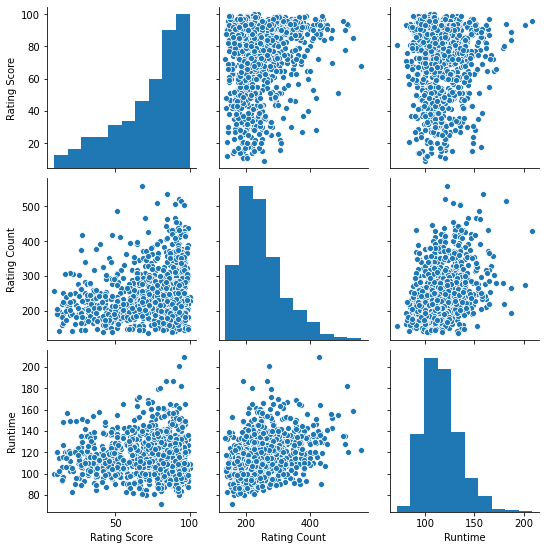

In [35]:
sns.pairplot(df_2)

In [36]:
corr = df_2.corr(method='pearson')

In [37]:
corr

,Rating Score,Rating Count,Runtime
Rating Score,1.000000,0.246579,0.017309
Rating Count,0.246579,1.000000,0.354810
Runtime,0.017309,0.354810,1.000000


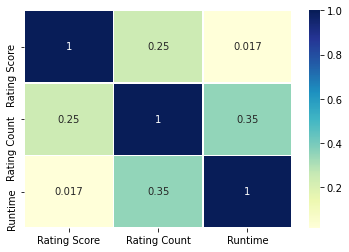

In [38]:
sns.heatmap(corr,cmap = "YlGnBu",annot =True, linewidths=.5,)


# From the heatmap we can see that the correlation between each variables are low (ranging from 0.017 to 0.35) 
### a) Rating Score & Runtime has almost no correlation
### b) Raiting count & Rating score has low correlation (0.25) while runtime & rating count has low correlation (0.35)

# Standardization of data

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
std_scale = StandardScaler()
X = std_scale.fit_transform(df_2[['Rating Score', 'Rating Count', 'Runtime']])

In [41]:
X

array([[-0.19440871,  4.3662326 ,  0.29303331],
       [ 0.57688003,  4.02846896,  2.27299115],
       [ 0.93983944,  3.81736669,  0.18600857],
       ...,
       [-1.32865686, -1.06613259, -0.93775129],
       [-0.28514856, -0.62985456, -1.63341215],
       [-1.60087642, -0.78466289, -0.88423892]])

# Performing DBSCAN

In [42]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

### Calculate the distance from each point to its closest neightbour using NearestNeighbors library. K Neighbors returns two arrays which is distance to the closest n_neighbors points and the index for each of these points.

In [43]:
neighbors = NearestNeighbors(n_neighbors=2)
nbrs = neighbors.fit(X)
distance, indices = nbrs.kneighbors(X)

In [44]:
print(nbrs.kneighbors(X))

(array([[0.        , 0.88570926],
       [0.        , 0.99813865],
       [0.        , 0.81622413],
       ...,
       [0.        , 0.11944163],
       [0.        , 0.26323874],
       [0.        , 0.23686894]]), array([[  0,   4],
       [  1,  13],
       [  2,   4],
       ...,
       [955, 885],
       [956, 421],
       [957, 458]], dtype=int64))


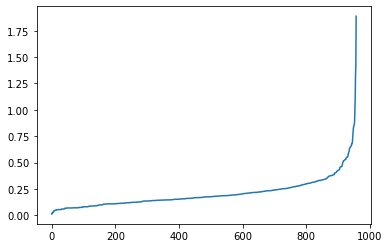

In [45]:
distance = np.sort(distance, axis=0)
distance = distance[:,1]
plt.plot(distance)

### Optimal value for epsilon is found at the maximum curvature point in this case it is around 0.5

In [46]:
model = DBSCAN(eps=0.5, min_samples=20).fit(X)

In [47]:
df_2['Cluster'] = model.labels_

In [48]:
df_2['Cluster'] = df_2['Cluster'].replace(-1,1)

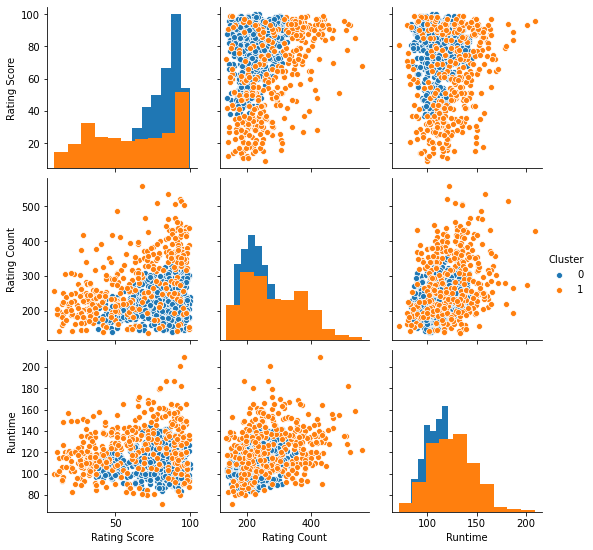

In [49]:
sns.pairplot(df_2,hue="Cluster",diag_kind="hist")

In [51]:
df_2.head()

,Movie Name,Rating Score,Rating Count,Runtime,Cluster
0,Joker (2019),68,559,122,1
1,Once Upon a Time In Hollywood (2019),85,535,159,1
2,Us (2019),93,520,120,1
3,Avengers: Endgame (2019),94,514,182,1
4,Captain Marvel (2019),78,510,128,1


# Conclusion
## DBSCAN will figure out the number of clusters. It works by finding out if the minimum number of points are close enough to one another to be considered part of a cluster. It is sensitive to scale since epsilon is a fixed value for the maximum distance between two points.